# [Learning Machines](http://www.patrickhebron.com/learning-machines/index.html)

###### Taught by [Patrick Hebron](http://www.patrickhebron.com) at [NYU/ITP](http://itp.nyu.edu), Fall 2017

### TensorFlow Basics: "Loading Data"

****

In [1]:
# Import TensorFlow library:
import tensorflow as tf

# Import matplotlib and numpy libraries (used to show image):
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np

**Feeding Data from Python Code:**

In [2]:
# Create python list constants:
constantX       = [  1.0,  2.0,  3.0 ]
constantY       = [ 10.0, 20.0, 30.0 ]

# Create addition operation (for constants):
addConstants    = tf.add( constantX, constantY )

# Create session:
with tf.Session() as sess:
    # Run session on constants and print output:
    print sess.run( addConstants )

# Create placeholders:
placeholderX    = tf.placeholder( tf.float32 )
placeholderY    = tf.placeholder( tf.float32 )

# Create addition operation (for placeholders):
addPlaceholders = tf.add( placeholderX, placeholderY )

# Create session:
with tf.Session() as sess:
     # Run session on placeholders and print output:
    print sess.run( addPlaceholders, feed_dict={ placeholderX: constantX, placeholderY: constantY } )

[ 11.  22.  33.]
[ 11.  22.  33.]


**Loading Data from File:**

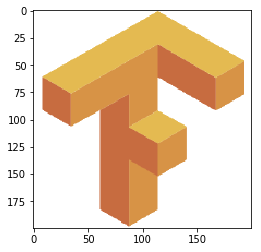

In [3]:
# Define file-reader function:
def read_file(filepath):
    file_queue  = tf.train.string_input_producer( [ filepath ] )
    file_reader = tf.WholeFileReader()
    _, contents = file_reader.read( file_queue )
    return contents

# Create PNG image loader operation:
load_op = tf.image.decode_png( read_file( 'data/tf.png' ) )

# Create JPG image loader operation:
# load_op = tf.image.decode_jpg( read_file( 'data/myimage.jpg' ) )

# Create session:
with tf.Session() as sess:
    # Initialize global variables:
    sess.run( tf.global_variables_initializer() )

    # Start queue coordinator:
    coord   = tf.train.Coordinator()
    threads = tf.train.start_queue_runners( coord=coord )

    # Run session on image loader op:
    image = sess.run( load_op )
    
    # Terminate queue coordinator:
    coord.request_stop()
    coord.join( threads )
    
    # Show image:
    imshow( np.asarray( image ) )